# <font color='red'> 1 - ENTENDIMENTO DO NEGÓCIO
<a id='descricao'></a>

## <font color='blue'> DESCRIÇÃO DO NEGÓCIO

- Base de dados: https://www.kaggle.com/arjunbhasin2013/ccdata

<font color='green'> **Objetivo:**
- Fazer uma segmentação de clientes para definir a estratégia de marketing.

<font color='green'> **O contexto:**

- Hoje sabemos que é de fundamental importância segmentar os nossos clientes para saber qual o padrão de consumo de cada um, e saber quais clientes estão mais propensos a comprar determinados tipos e marcas de produtos.
- Um dos pontos cruciais de marketing é conhecer os clientes e identificar suas necessidades e entendendo os consumidores podemos enviar campanhas específicas para necessidades específicas e se dados sobre os clientes estão disponíveis, podemos aplicar Ciência de Dados para segmentar o mercado.
- O conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 portadores de cartão de crédito ativos durante os últimos 6 meses.

<font color='green'> **Causa raiz do problema:**
- O departamento de marketing precisa enviar campanhas personalizadas dependendo do tipo de cliente.

<font color='green'> **Stakeholder:**
- Gerente de estratégia de marketing.

<font color='green'> **O formato da solução:**
- Granularidade
    - Dividir os clientes em pelo menos 3 grupos.
- Tipo do problema
    - Problema de clusterização (A clusterização é uma técnica de machine learning não supervisionado que visa agrupar os dados em determinados conjuntos distintos entre si).
- Potenciais métodos
    - Nesta abordagem vou usar o algoritmo K-Means que trabalha com Clustering.
- Formato da entrega
    - Tabela em csv.

**Definição:**
- Precisamos entender os hábitos dos clientes, pois entendendo estes hábitos nós conseguimos separar os clientes em grupos de interesse, desta forma podemos enviar campanhas personalizadas para cada um dos grupos.

## <font color='blue'> PLANEJAMENTO DA SOLUÇÃO

O planejamento da solução para este projeto se baseia no método CRISP-DM (Cross Industry Standard Process for Data Mining), que é uma metodologia cíclica e flexivel voltada para resolução de problemas que envolvem grande volume de dados que permite a entrega rápida de valor para os times de negócio.

1. **ENTENDIMENTO DO NEGÓCIO**
2. **COLETA DOS DADOS**
3. **LIMPEZA DOS DADOS**
    - **Passo 1:** Análise Descritiva dos Dados
    - **Passo 2:** Filtragem das Variáveis
    
    
4. **ANÁLISE EXPLORATÓRIA DOS DADOS**
    - **Passo 3:** Exploração de Dados
    
    
5. **PREPARAÇÃO DOS DADOS**
    - **Passo 4:** Modelagem dos Dados
    
    
6. **TREINAMENTO ALGORITMOS DE MACHINE LEARNING**
    - **Passo 5:** Algoritmos de Machine Learning
    
    
7. **AVALIAÇÃO DO ALGORITMO**
    - **Passo 6:** Tradução e Interpretação do modelo


8. **IMPLEMENTAR O MODELO PARA A PRODUÇÃO**
    - **Passo 7:** Modelo em Produção
    
- **INSIGHTS**
- **PRÓXIMO PASSOS**

# <font color='red'> 2 - COLETA DOS DADOS
<a id='dados'></a>

## <font color='blue'> PASSO 0.0 - Biblioteca

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection


from sklearn.preprocessing      import StandardScaler # Para colocar os dados em uma mesma escala
from sklearn.cluster            import KMeans # Algoritmo para fazer a segmentação de mercado ou agrupamento dos clientes
from sklearn.decomposition      import PCA # Para redução de dimensionalidade dos dados

## <font color='blue'> PASSO 0.1 - Carregando dos dados

In [2]:
df_clientes = pd.read_csv('Datasets/Marketing_data.csv')

In [3]:
pd.set_option('display.max_columns',None)

# <font color='red'> 3 - LIMPEZA DOS DADOS
<a id='definicao'></a>

## <font color='blue'> PASSO 1 - Análise Descritiva dos Dados
<a id='passo1'></a>

### <font color='#F37126'> 1.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [4]:
df_clientes.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df_clientes.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


**Nota:**
- CUSTID: Identificação do cliente
- BALANCE: Saldo para fazer compras (saldo na conta corrente)
- BALANCE_FREQUENCY: Frequência que o saldo é atualizado, ou seja se o cliente mantém dinheiro na conta corrente para fazer compras no cartão de débito (1 = frequente, 0 = não frequente)
- PURCHASES: Quantidade de compras realizadas
- ONEOFFPURCHASES: Quantidade de compras feitas “de uma só vez” (sem parcelar)
- INSTALLMENTS_PURCHASES: Quantidade de compras parceladas
- CASH_ADVANCE: Dinheiro adiantado, indica se o cliente saca do cartão de crédito
- PURCHASES_FREQUENCY: Frequência das compras (entre 1 e 0)
- ONEOFF_PURCHASES_FREQUENCY: Frequência de compras à vista (entre 1 e 0)
- PURCHASES_INSTALLMENTS_FREQUENCY: Frequência de compras parceladas (entre 1 e 0)
- CASH_ADVANCE_FREQUENCY: Frequência de saques de dinheiro adiantado
- CASH_ADVANCE_TRX: Número de transações feitas como "Cash in Advance", indica quantas vezes o cliente foi no caixa eletrônico e solicitou dinheiro adiantado 
- PURCHASES_TRX: Número de compras
- CREDIT_LIMIT: Limite do cartão de crédito
- PAYMENTS: Valor pago
- MINIMUM_PAYMENTS: Valor mínimo pago
- PRC_FULL_PAYMENT: Percentual de pagamentos da fatura “completa”
- TENURE: Posse do titular do cartão

### <font color='#F37126'> 1.2. Colunas

**Visualizando cabeçalho do dataframe**

In [6]:
print(df_clientes.columns.tolist())

['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [7]:
# Alterando as nomes das colunas
cols_old = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

snakecase = lambda x: inflection.underscore (x)

cols_new = list(map(snakecase,cols_old))

df_clientes.columns = cols_new

In [8]:
print(df_clientes.columns.tolist())

['cust_id', 'balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']


### <font color='#F37126'> 1.3. Dimensões de dados

**Verificando informações sobre o dataframe: linhas e colunas**

In [9]:
df_clientes.shape

(8950, 18)

In [10]:
# Quantidade de valores únicos no dataframe
df_clientes.apply(lambda x: x.unique().shape[0])

cust_id                             8950
balance                             8871
balance_frequency                     43
purchases                           6203
oneoff_purchases                    4014
installments_purchases              4452
cash_advance                        4323
purchases_frequency                   47
oneoff_purchases_frequency            47
purchases_installments_frequency      47
cash_advance_frequency                54
cash_advance_trx                      65
purchases_trx                        173
credit_limit                         206
payments                            8711
minimum_payments                    8637
prc_full_payment                      47
tenure                                 7
dtype: int64

In [11]:
# Valores únicos
df_clientes['cust_id'].value_counts()

C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: cust_id, Length: 8950, dtype: int64

### <font color='#F37126'> 1.4. Tipos de dados

**Verificando o tipo das colunas**

In [12]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

### <font color='#F37126'> 1.5. Check dados nulos

**Verificando dados nulos**

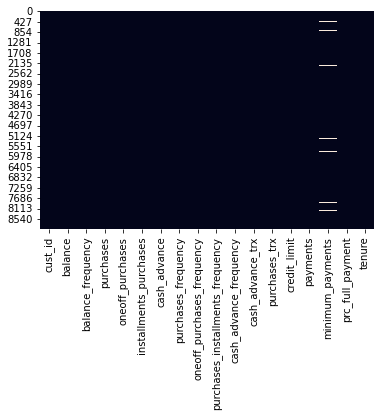

In [13]:
sns.heatmap(df_clientes.isnull(),cbar=False);

In [14]:
df_clientes.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [ ]:
# Conta a quantidade de missing values totais da base.
df_clientes.isnull().sum().sum()

### <font color='#F37126'> 1.6. Estatística descritiva

**Descrevendo estatísticas sobre os dados**

#### Separando os tipos de variáveis

In [15]:
num_dados = df_clientes.select_dtypes( include = ['int64','float64'] )
cat_dados = df_clientes.select_dtypes( exclude = ['int64','float64'] )

In [16]:
df_clientes.describe().round(1)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8949.0,8950.0,8637.0,8950.0,8950.0
mean,1564.5,0.9,1003.2,592.4,411.1,978.9,0.5,0.2,0.4,0.1,3.2,14.7,4494.4,1733.1,864.2,0.2,11.5
std,2081.5,0.2,2136.6,1659.9,904.3,2097.2,0.4,0.3,0.4,0.2,6.8,24.9,3638.8,2895.1,2372.4,0.3,1.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,6.0
25%,128.3,0.9,39.6,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0,1600.0,383.3,169.1,0.0,12.0
50%,873.4,1.0,361.3,38.0,89.0,0.0,0.5,0.1,0.2,0.0,0.0,7.0,3000.0,856.9,312.3,0.0,12.0
75%,2054.1,1.0,1110.1,577.4,468.6,1113.8,0.9,0.3,0.8,0.2,4.0,17.0,6500.0,1901.1,825.5,0.1,12.0
max,19043.1,1.0,49039.6,40761.2,22500.0,47137.2,1.0,1.0,1.0,1.5,123.0,358.0,30000.0,50721.5,76406.2,1.0,12.0


**Nota:**

- No atributo **"cash_advance"**, temos um valor muito alto, ou seja mostra que as pessoas sacam mais dinheiro do limite do cartão de crédito do que fazer compras parceladas e compras a vista, este valor pode ser ruim para o cliente, pois as taxas são muito alta, porém para o banco é muito interessante, porque eles vão ganhar muito mais com os juros.

**Insights:**

- Aqui temos um insights, onde podemos separar um grupo de cliente que possuem uma tendência maior a sacar dinheiro do limite do cartão de crédito, pois assim o banco poderia aumentar o limite e os clientes poderia sacar mais dinheiro e o banco passaria a ganhar mais. 
- Poderiamos separar grupos, pessoas que faz compra a vista e pessoas que faz compras a prazo, para que o banco possa enviar campanha de marketing diferentes.

#### Colunas numéricas

In [17]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_dados.apply(np.mean) ).T
ct2 = pd.DataFrame( num_dados.apply(np.median) ).T

In [18]:
# Desvio Padrão
d1 = pd.DataFrame( num_dados.apply( np.std ) ).T
# Mínimo
d2 = pd.DataFrame( num_dados.apply( min ) ).T
# Máximo
d3 = pd.DataFrame( num_dados.apply( max ) ).T
# Range
d4 = pd.DataFrame( num_dados.apply( lambda x: x.max() - x.min() ) ).T
# Skew
d5 = pd.DataFrame( num_dados.apply( lambda x: x.skew() ) ).T
# Kurtosis
d6 = pd.DataFrame( num_dados.apply( lambda x: x.kurtosis() ) ).T 

In [19]:
# Juntando as metricas em uma tabela
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,balance,0.000000,19043.13856,19043.138560,1564.474828,873.385231,2081.415590,2.393386,7.674751
1,balance_frequency,0.000000,1.00000,1.000000,0.877271,1.000000,0.236891,-2.023266,3.092370
2,purchases,0.000000,49039.57000,49039.570000,1003.204834,361.280000,2136.515413,8.144269,111.388771
3,oneoff_purchases,0.000000,40761.25000,40761.250000,592.437371,38.000000,1659.795184,10.045083,164.187572
4,installments_purchases,0.000000,22500.00000,22500.000000,411.067645,89.000000,904.287592,7.299120,96.575178
5,cash_advance,0.000000,47137.21176,47137.211760,978.871112,0.000000,2097.046713,5.166609,52.899434
6,purchases_frequency,0.000000,1.00000,1.000000,0.490351,0.500000,0.401348,0.060164,-1.638631
7,oneoff_purchases_frequency,0.000000,1.00000,1.000000,0.202458,0.083333,0.298319,1.535613,1.161846
8,purchases_installments_frequency,0.000000,1.00000,1.000000,0.364437,0.166667,0.397426,0.509201,-1.398632
9,cash_advance_frequency,0.000000,1.50000,1.500000,0.135144,0.000000,0.200110,1.828686,3.334734


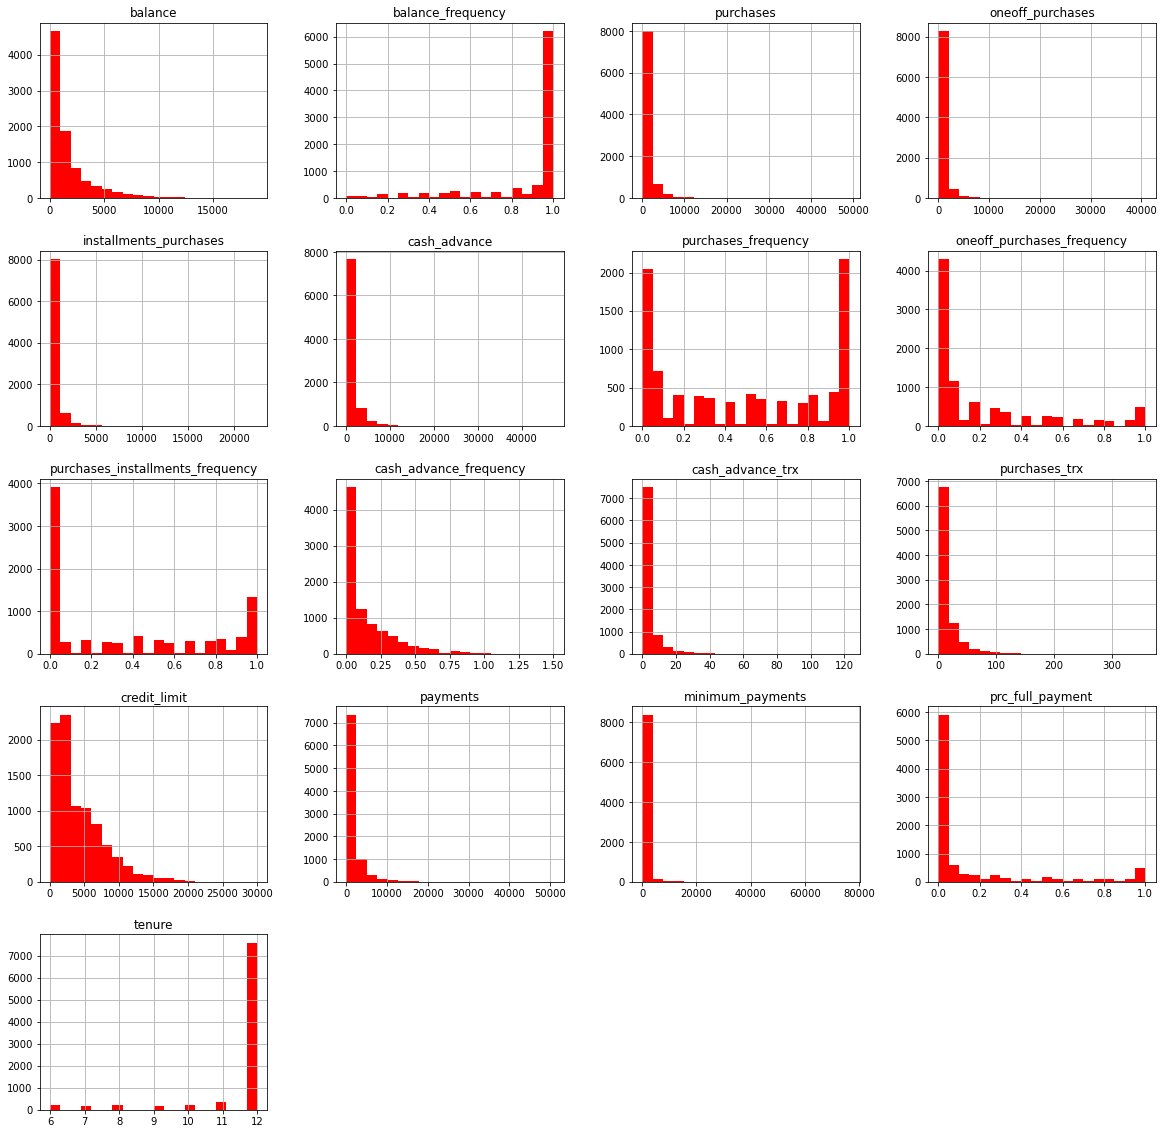

In [20]:
# Histograma para ver a distribuição dos dados
num_dados.hist(bins=20, figsize=(20,20), color = 'r');

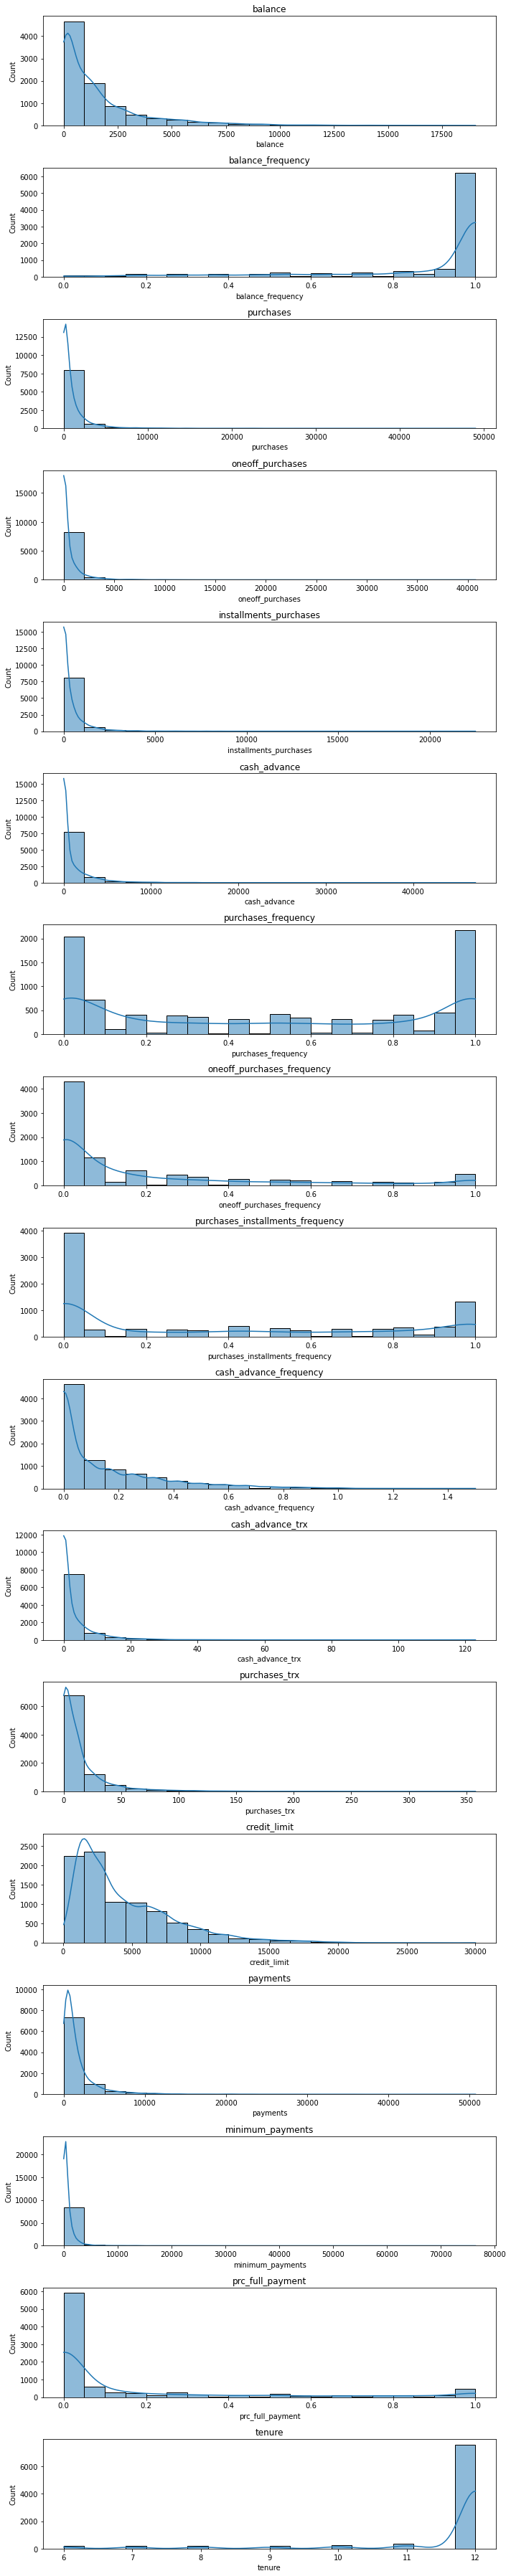

In [21]:
# Histograma para ver a distribuição dos dados para cada atributo
plt.figure(figsize=(10,50))

for i in range(len(num_dados.columns)):
    plt.subplot(17,1, i + 1)
    sns.histplot(num_dados[num_dados.columns[i]], bins=20, kde=True)
    plt.title(num_dados.columns[i])

plt.tight_layout();

**Nota:**
- Balance: Podemos ver que a maior concentração das pessoas tem um saldo na conta corrente abaixo de 2 mil para fazer compras.
- Balance_frequency: A maioria das pessoas na base de dados mantém dinheiro na conta corrente para fazer compras no cartão de débito.

**Obs.: Talvez as pessoas que mantém as contas atualizadas, o saldo seja baixo de 2 mil.**

- Quantidade de compras parceladas (installments_purchases) é maior que compras feitas “de uma só vez” (oneoff_purchases).
- Purchases_frequency: Podemos identificar dois grupos, um grupo de que usa muito o cartão de crédito e outro que praticamente não usa cartão de crédito, desta forma o banco pode análisar e mandar campanha diferente para cada perfil de cliente.

#### Colunas Categóricas

In [22]:
# Verificando os valores únicos das colunas
cat_dados.apply(lambda x: x.unique().shape[0])

cust_id    8950
dtype: int64

## <font color='blue'> PASSO 2 - Filtragem das Variáveis
<a id='passo3'></a>

### <font color='#F37126'> 2.1. Filtragem das Linhas

In [23]:
# Média
df_clientes['minimum_payments'].mean()

864.2065423050816

In [24]:
# Fazendo a média para preencher os valores nulos
df_clientes.loc[(df_clientes['minimum_payments'].isnull() == True), 'minimum_payments'] = df_clientes['minimum_payments'].mean()

In [25]:
# Média
df_clientes['credit_limit'].mean()

4494.449450364621

In [26]:
df_clientes.loc[(df_clientes.credit_limit.isnull() == True), 'credit_limit'] = df_clientes.credit_limit.mean()

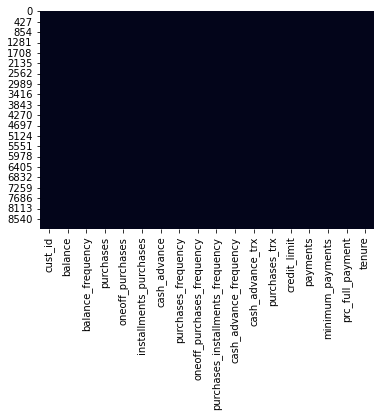

In [27]:
sns.heatmap(df_clientes.isnull(),cbar=False);

In [28]:
df_clientes.isnull().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [29]:
# Verificando se tem valores duplicados
df_clientes.duplicated().sum()

0

### <font color='#F37126'> 2.2. Selecão das Colunas

In [30]:
# Apagando o atributo "CUST_ID"
df_clientes.drop('cust_id',axis=1,inplace=True)

In [31]:
len(df_clientes.columns)

17

# <font color='red'> 4 - ANÁLISE EXPLORATÓRIA DOS DADOS
<a id='eda'></a>

## <font color='blue'> PASSO 3 - Exploração de Dados
<a id='passo4'></a>

### <font color='#F37126'> 3.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [32]:
df4_clientes = df_clientes.copy()

In [33]:
df4_clientes.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
df4_clientes.shape

(8950, 17)

### <font color='#F37126'> 3.2. Análise Univariada

In [35]:
# O cliente que fez a compra mais alta
df4_clientes[df4_clientes['oneoff_purchases'] == 40761.250000]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [36]:
# O cliente que saca o maior valor do cartão de crédito
df4_clientes['cash_advance'].max()

47137.21176

In [37]:
# O cliente que saca o maior valor do cartão de crédito
df4_clientes[df4_clientes['cash_advance'] == 47137.21176]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### <font color='#F37126'> 3.3. Análise Multivariada

**Correlação para ver o quanto um atributo pode influênciar o outro**

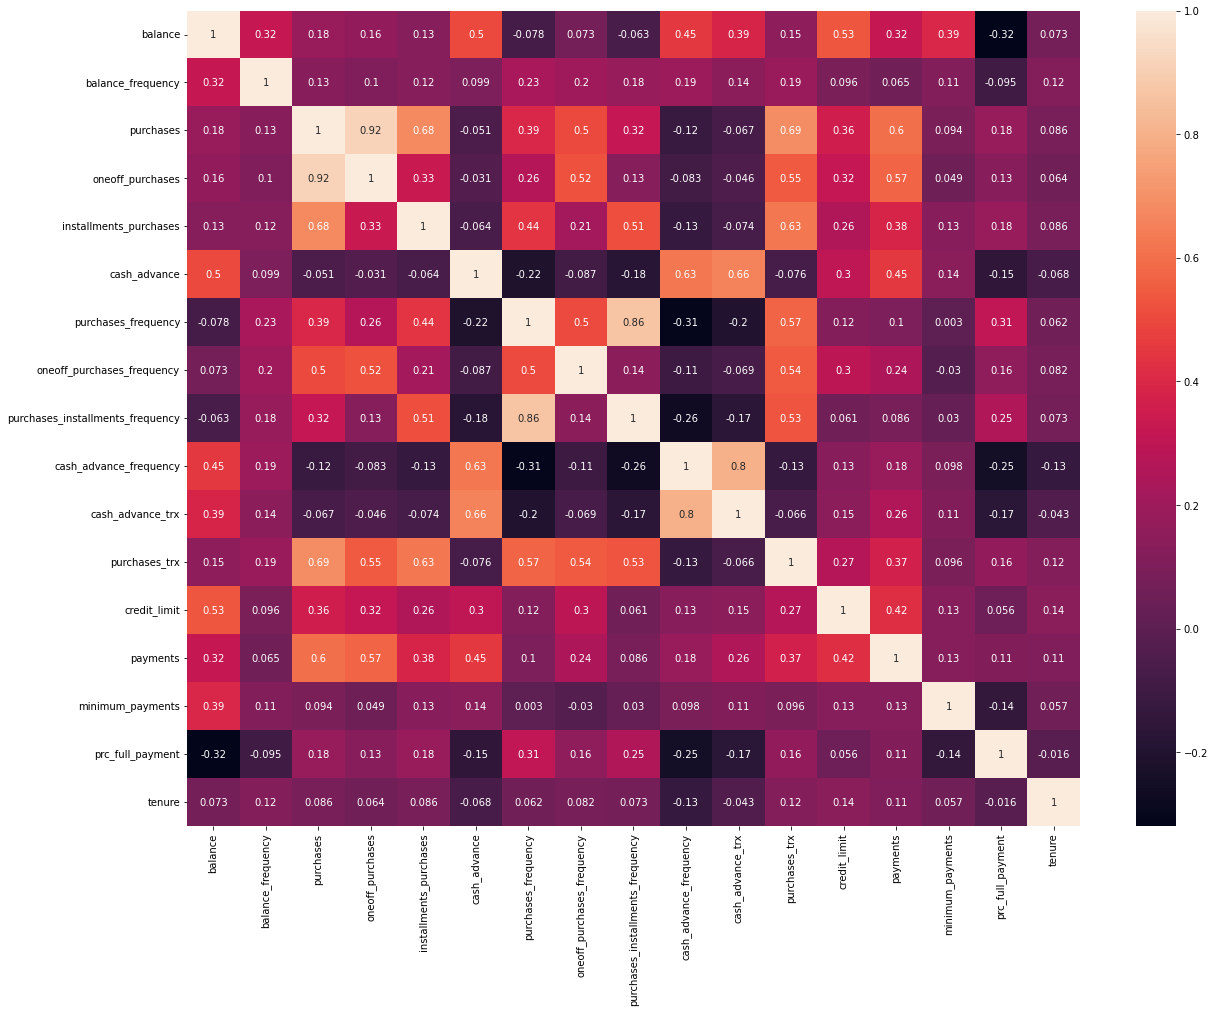

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
correlations = df4_clientes.corr()
sns.heatmap(correlations, annot=True);
plt.show()

**Nota:**
- Podemos ver uma correlção negativa entre **Prc_Full_Payment / Cash_Advance_Frequency**, que pode indicar, que quanto maior a frequência de saque do limite do cartão de crédito, menor é o valor de pagamento da fatura de crédito.

# <font color='red'> 5 - PREPARAÇÃO DOS DADOS
<a id='tratamento'></a>

## <font color='blue'> PASSO 4 - Modelagem dos Dados
<a id='passo5'></a>

### <font color='#F37126'> 4.1. Leitura dos dados

In [39]:
df5_clientes = df4_clientes.copy()

In [40]:
df5_clientes.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### <font color='#F37126'> 4.2. Rescaling

In [41]:
# Verificando o mínimo e maximo
min(df5_clientes['balance']), max(df5_clientes['balance'])

(0.0, 19043.13856)

**Nota:**
- Podemos um observar uma grande diferença de escala entre este valores, e como vamos trabalhar com o algoritmo k-means, onde ele vai fazer o cálculo de distância utilizando a fórmula de Euclidiana, e se deixar os valores com essa diferença ele vai considerar um atributo mais importante que o outro, por essa razão precisamos deixar todos na mesma escala.

In [42]:
# Método para colocar os valores na mesma escala
scaler = StandardScaler() # está função é muito indicado para quando temos muito outliers na base de dados.
df5_clientes_scaler = scaler.fit_transform(df5_clientes)

In [43]:
type(df5_clientes_scaler), type(df5_clientes)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [44]:
# Agora temos os valores em uma escala diferente
min(df5_clientes_scaler[0]), max(df5_clientes_scaler[0])

(-0.9604333444542572, 0.36067954425377496)

In [45]:
# Agora temos os valores em uma escala diferente
min(df5_clientes_scaler[0]), max(df5_clientes_scaler[0])

(-0.9604333444542572, 0.36067954425377496)

In [46]:
# Todos os dados estão escalonados
df5_clientes_scaler

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### <font color='#F37126'> 4.3. Calculando para encontrar número de clusters

Precisamos definir o número de clusters e para isso existem algumas técnicas que podemos utilizar para saber o número ideal de grupos de acordo com a base de dados.
- Definição do número de clusters usando o Elbow Method, que é chamado do método do cotovelo.

Para termos o valor de wcss, precisamos criar o algoritmo k-means, fazer o agrupamento, para depois conseguir o valor de wcss.

In [47]:
# Cálculo para encontrar qual o cluster ideal (vamos fazer um agrupamento até chegar a 20 clusters)
wcss_1 = []
range_values = range(1, 20) # vamos cálcular para 20 clusters
for i in range_values:
    kmeans = KMeans(n_clusters=i) # Criando um objeto tipo k-means
    kmeans.fit(df5_clientes_scaler) # Gera o grupo
    wcss_1.append(kmeans.inertia_) # Aqui adicionamos o valor wcss na lista que está dentro do parâmetro 'inertia_'

In [48]:
# Retorna os 20 valores do wcss
print(wcss_1)

[152150.0000000002, 127784.84427201995, 111986.67194121171, 99073.95062236278, 91502.98259428897, 84867.86941404414, 79532.51360584305, 75190.92033595685, 69847.37311607008, 66460.69493742107, 63617.57708101736, 61352.780279222185, 59150.08910216538, 57460.002430946304, 55887.572506923134, 54575.22735012998, 53197.29685129545, 51620.33449026533, 50368.66161024659]


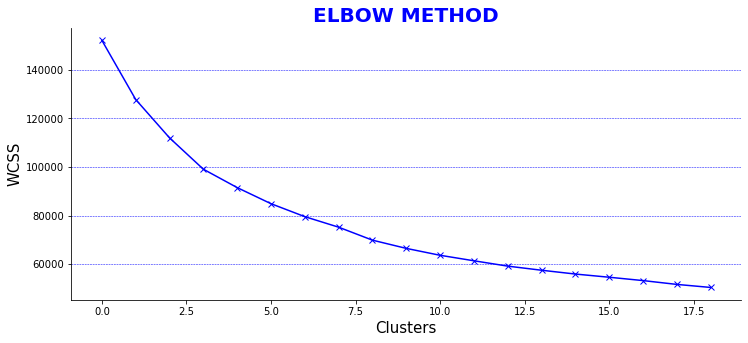

In [49]:
# Visualização gráfica para aplicar “ELBOW METHOD” (MÉTODO DO COTOVELO)

plt.figure(figsize=[12,5])

plt.plot(wcss_1, 'bx-')

plt.title('ELBOW METHOD',fontsize = 20, color='blue',fontweight='bold')

plt.xlabel('Clusters',fontsize=15)
plt.ylabel('WCSS',fontsize=15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y',color = 'blue', linestyle = '--', linewidth = 0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

**Nota:**
- Devemos encontrar no gráfico o ponto, onde apresenta quando não tem mais tanta queda no valor WCSS.
- Em torno da quantidade 4 de clusters, ele começa a formar a curva do cotovelo e nós podemos observar que até o cluster 8 têm uma queda de certa forma acentuada, depois do cluster 8, nós podemos observar que ele já está seguindo uma forma linear, nós não temos uma diferença muito grande.
- Podemos concluir que utilizando esse método do cotovelo, que o número ideal de clusters é igual a 8 ou a 7.

# <font color='red'> 6 - TREINAMENTO ALGORITMOS DE MACHINE LEARNING
<a id='ml'></a>

## <font color='blue'> PASSO 5 - Algoritmos de Machine Learning
<a id='passo7'></a>

### <font color='#F37126'> 5.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [50]:
df7_clientes = df5_clientes_scaler.copy()

### <font color='#F37126'> 5.2. K-MEANS

Algoritmo não supervisionado (clustering - agrupamento)
- Algoritmo não supervisionado indica que nós não temos uma classe, objetivo é não pe fazer previsões, mas a ideia é agrupar os dados baseado em atributos similares, por meio do cálculo da Distância Euclidiana que é uma fórmula matemática que vai medir o quanto dois pontos são parecidos, quanto mais parecidos, mas esses dados têm a tendência a pertencerem ao mesmo grupo.

In [51]:
# Criando a variável que vai fazer o agrupamento (n_clusters=8, este valor vem do método Elbow)
kmeans = KMeans(n_clusters=8)
# O código 'fit', vai fazer todo o treinamento do algoritmo k-means, para colocar cada um dos registros em um dos 8 grupos
kmeans.fit(df7_clientes)
# Criando a variável labels e desta forma cada registro tem um clusters associado
labels = kmeans.labels_

In [52]:
# Depois do treinamento podemos visualizar a que grupo cada cliente pertence
labels, len(labels)

(array([0, 2, 1, ..., 5, 5, 5]), 8950)

In [53]:
# Podemos checar a quantidade de cliente por grupo (exemplo: no grupo 0 temos 622 clientes)
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2767, 1123,  882, 2016,  330,  625, 1184,   23], dtype=int64))

**Nota:**
- No grupo 4 temos é onde tem a maior quantidade de clientes.

In [54]:
# Podemos ver a média para cada um dos atributos (a média é os centroides para cada grupo)
kmeans.cluster_centers_

array([[ 6.34081911e-03,  4.03802391e-01, -3.54515164e-01,
        -2.39269361e-01, -3.98557104e-01, -1.00151496e-01,
        -8.42030381e-01, -3.84830587e-01, -7.50723695e-01,
         9.27361852e-02, -3.59322901e-02, -4.78141689e-01,
        -3.06541103e-01, -2.52165368e-01, -1.34970632e-02,
        -4.54891857e-01,  2.73960665e-01],
       [-1.21275285e-01,  4.03074815e-01,  5.63245473e-01,
         6.83410734e-01,  7.60384296e-02, -3.32537292e-01,
         9.97086755e-01,  1.91368949e+00,  2.12153418e-01,
        -4.17084986e-01, -3.33321370e-01,  6.58171666e-01,
         4.58040139e-01,  1.62137072e-01, -1.55258903e-01,
         4.54802865e-01,  2.72768817e-01],
       [ 1.67432126e+00,  3.94876103e-01, -2.20859691e-01,
        -1.57055453e-01, -2.33747860e-01,  1.99290822e+00,
        -4.81496182e-01, -2.11898061e-01, -4.21827885e-01,
         1.91098989e+00,  1.91563532e+00, -2.70218742e-01,
         1.01325683e+00,  7.98372579e-01,  5.47399890e-01,
        -3.95539479e-01,  7.2

In [55]:
# Criar um dataframe para visualizar a média para cada atributo
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df5_clientes.columns])
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,0.006341,0.403802,-0.354515,-0.239269,-0.398557,-0.100151,-0.842030,-0.384831,-0.750724,0.092736,-0.035932,-0.478142,-0.306541,-0.252165,-0.013497,-0.454892,0.273961
1,-0.121275,0.403075,0.563245,0.683411,0.076038,-0.332537,0.997087,1.913689,0.212153,-0.417085,-0.333321,0.658172,0.458040,0.162137,-0.155259,0.454803,0.272769
2,1.674321,0.394876,-0.220860,-0.157055,-0.233748,1.992908,-0.481496,-0.211898,-0.421828,1.910990,1.915635,-0.270219,1.013257,0.798373,0.547400,-0.395539,0.072107
3,-0.358255,0.331954,-0.029691,-0.240793,0.371976,-0.362572,0.996698,-0.381406,1.208384,-0.472004,-0.359611,0.194979,-0.256897,-0.213196,-0.029915,0.315665,0.256207
4,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
5,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
6,-0.700802,-2.141183,-0.309850,-0.234317,-0.302039,-0.320128,-0.554233,-0.440811,-0.439716,-0.521014,-0.376316,-0.418604,-0.173308,-0.191875,-0.256477,0.285369,0.200376
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


**Nota:**
- Para o grupo 0 a média do dinheiro em conta é -0.336050, para segundo grupo é de 0.015325.
- Os valores estão em uma escala menor porque foi aplicado StandardScaler, mas fica de certa forma ruim para analisar os valores, então precisa dos dados reais, para tomar uma decisão sobre algo.

In [56]:
# Visualizando os valores originais (função para fazer o cálculo inverso scaler.inverse_transform(cluster_centers))
cluster_centers = scaler.inverse_transform(cluster_centers)
# Recriar o cluster_centers para dataframe (o resultado é a média para cada atributo)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df5_clientes.columns])
# O resultado é os centroides que indica os valores médios de cada clusters
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,1577.672707,0.972928,245.777722,195.299237,50.657401,768.848748,0.152403,0.087655,0.066081,0.153702,3.003615,2.825018,3379.127501,1003.149821,832.752206,0.020667,11.883948
1,1312.050559,0.972755,2206.587469,1726.759216,479.828253,281.524877,0.890530,0.773348,0.448753,0.051681,0.974153,31.069519,6160.986874,2202.514788,502.382219,0.286737,11.882353
2,5049.433193,0.970813,531.334700,331.757486,199.692356,5158.092738,0.297103,0.139244,0.196792,0.517553,16.321631,7.993205,8181.092350,4044.354241,2139.898896,0.038026,11.613817
3,818.797060,0.955908,939.768746,192.770942,747.440679,218.540823,0.890374,0.088677,0.844680,0.040691,0.794745,19.556272,3559.752207,1115.962042,794.492014,0.246041,11.860188
4,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
5,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800
6,105.815587,0.370044,341.205363,203.518742,137.937297,307.546906,0.267910,0.070955,0.189683,0.030884,0.680743,4.304899,3863.884666,1177.685781,266.498413,0.237180,11.785473
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


**Nota:**

Definindo o perfil dos clientes em quatro grupos:

- Grupo 0:
  - TENURE: Clientes mais novos (7.23)
  - BALANCE: E que mantém pouco dinheiro na conta corrente (865).
  
  
- Grupo 3:
  - BALANCE: É um dos grupo que mais deixam dinheiro na conta corrente (5567).
  - CREDIT_LIMIT : O limite do cartão alto a média é de 15570.
  - PRC_FULL_PAYMENT: É o grupo com o mais alto percentual de pagamento da fatura completa (0.47).

Este grupo pode ser considerados os clientes mais importantes para o banco (VIP/Prime), podemos dizer que o banco sempre vai ganhar dinheiro com estes clientes, porque eles usam o cartão e pagam a fatura em dias. Uma estratégia que o banco pode fazer é aumentar o limite do cartão e incentivar o hábito de compras através de uma campanha de marketing.


- Grupo 4:
  - CASH_ADVANCE: Sacam muito dinheiro do cartão de crédito (5207).
  - PURCHASES_FREQUENCY: Compram pouco (0.29).
  - CASH_ADVANCE_FREQUENCY: E usam bastante o limite do cartão para saques (0.51).
  - PRC_FULL_PAYMENT: Pagam muito pouco a fatura completa (0.03). 
  
Este pode ser considerado um grupo que o banco acaba ganhando bastante dinheiro, porque no uso do CASH_ADVANCE têm um juros muito alto, porém apresenta o maior risco para o banco, pórque se eles não pagam a fatura completa a tendência é que estes clientes vão endividar cada vez mais rápido e pode chegar em uma situação que eles não vão ter o dinheiro para pagar todos os estes juros para o banco.

- Grupo 7: 
  - São clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro.
  - BALANCE: Possui menos dinheiro na conta corrente (105).
  - CASH_ADVANCE: Não sacam muito dinheiro do limite do cartão (303).
  - PRC_FULL_PAYMENT: 23% dos clientes deste grupo pagam a fatura completa.
  
Uma hipótese é que eles deixam pouco dinheiro na conta corrente, para fazer aplicações financeiras, porque se deixar dinheiro na conta corrente não vai render nada.

# <font color='red'> 7 - AVALIAÇÃO DO ALGORITMO
<a id='modelo'></a>

## <font color='blue'> PASSO 6 - Tradução e Interpretação do modelo
<a id='passo9'></a>

### <font color='#F37126'> 6.1. Leitura dos dados

**Adicionar cada um dos grupos para cada um dos clientes**

Depois da análise feita para cada grupo e definindo o perfil para cada um deles, por meio da análise dos centroides e agora precisa adicionar cada um dos grupos para cada um dos clientes, ou seja vamos adicionar a informação dos grupos em cada um dos registros.

In [57]:
# Para isso vamos criar um novo dataframe
df_cluster = pd.concat([df5_clientes, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [58]:
np.unique(df_cluster['cluster'])

array([0, 1, 2, 3, 4, 5, 6, 7])

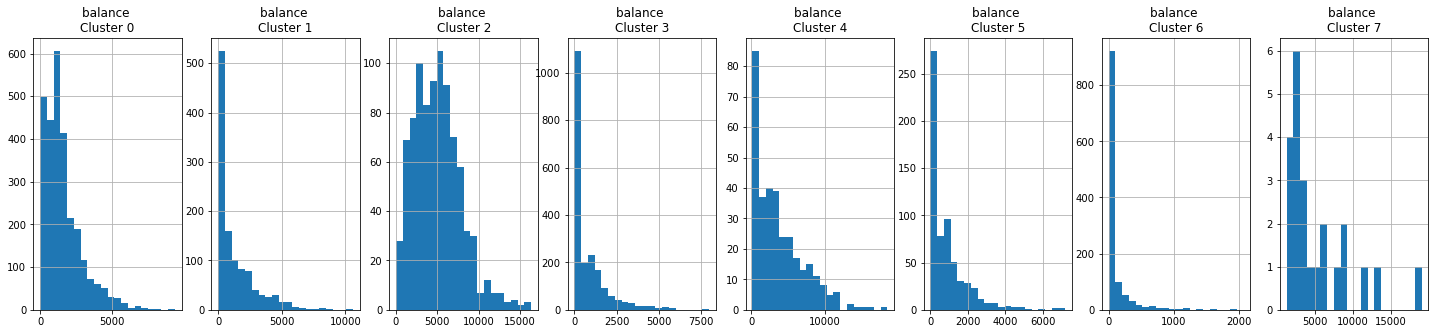

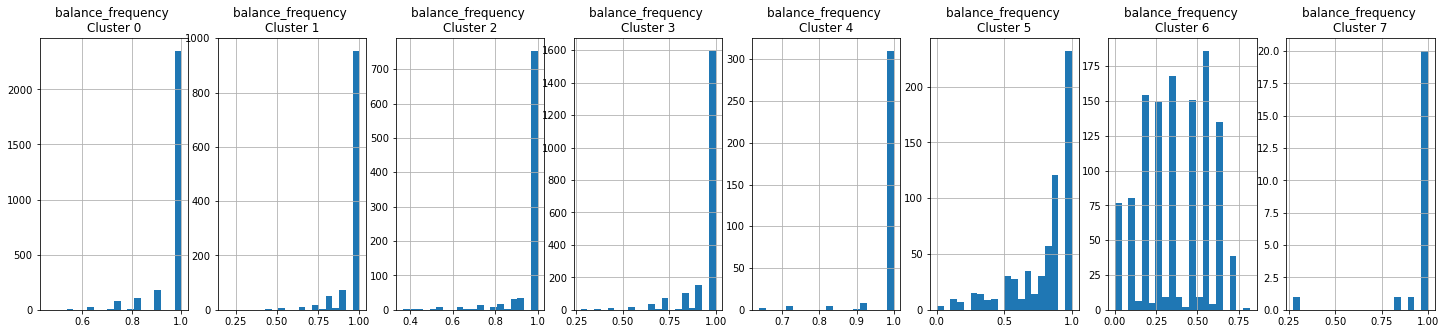

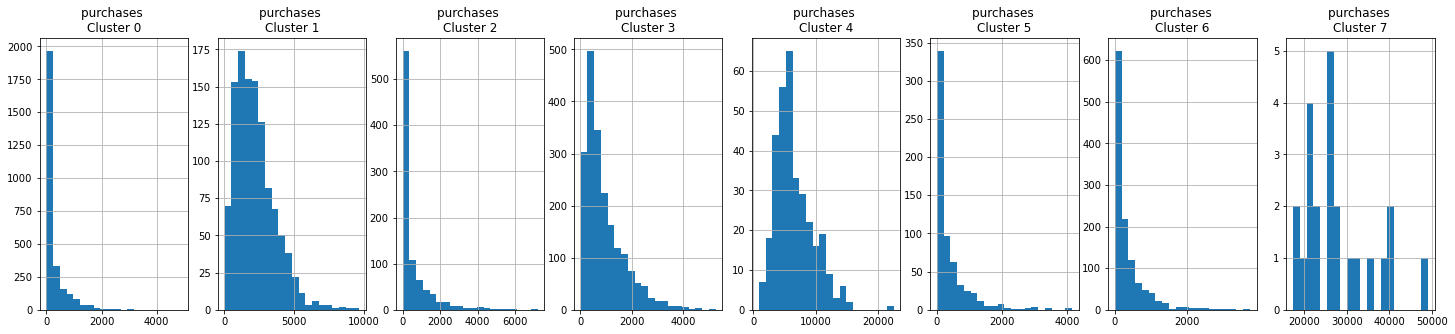

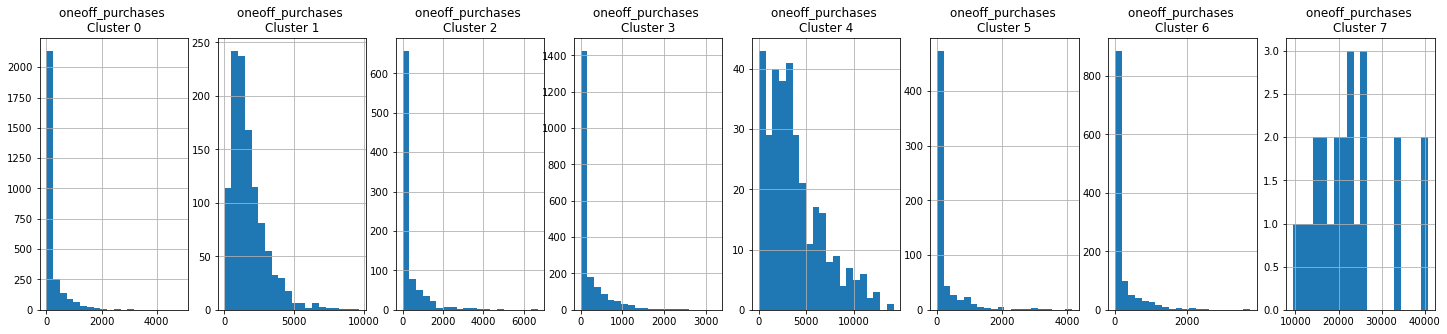

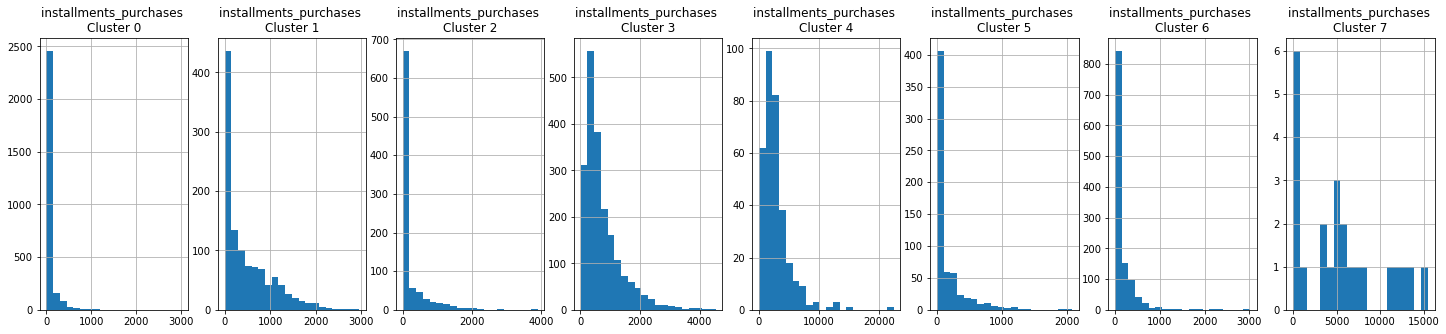

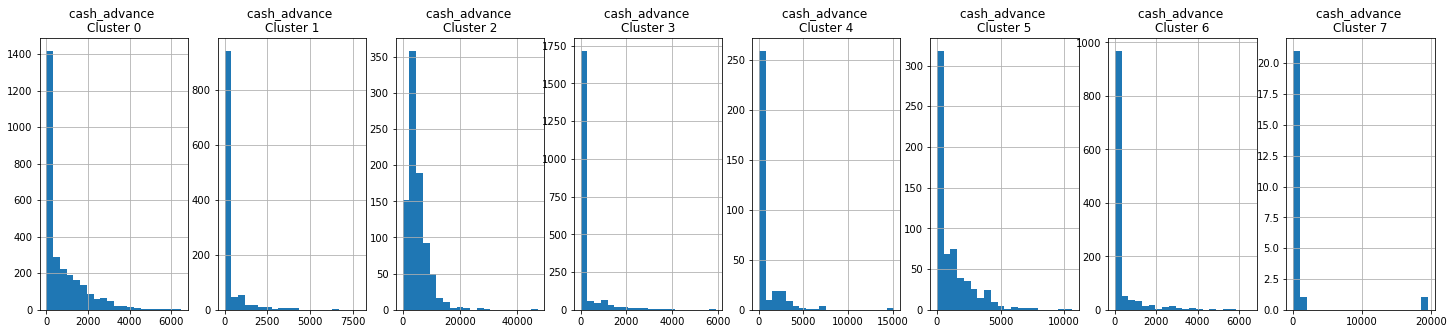

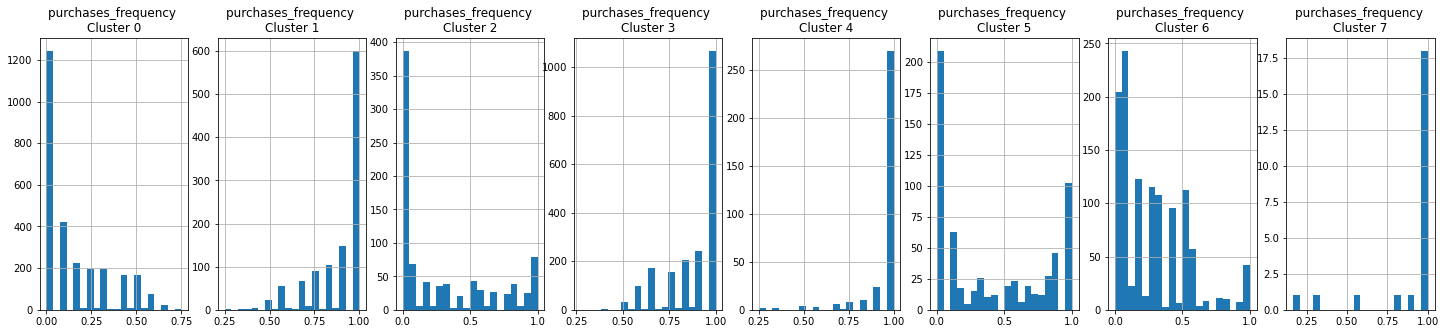

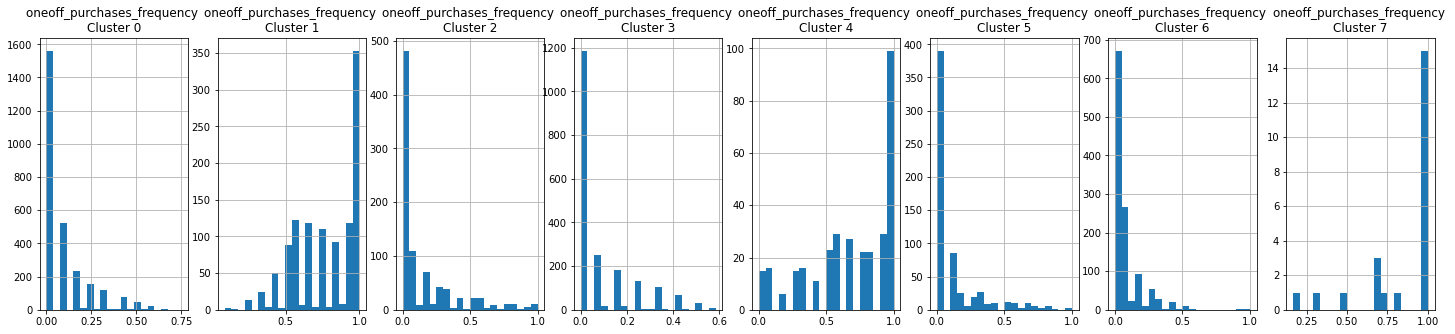

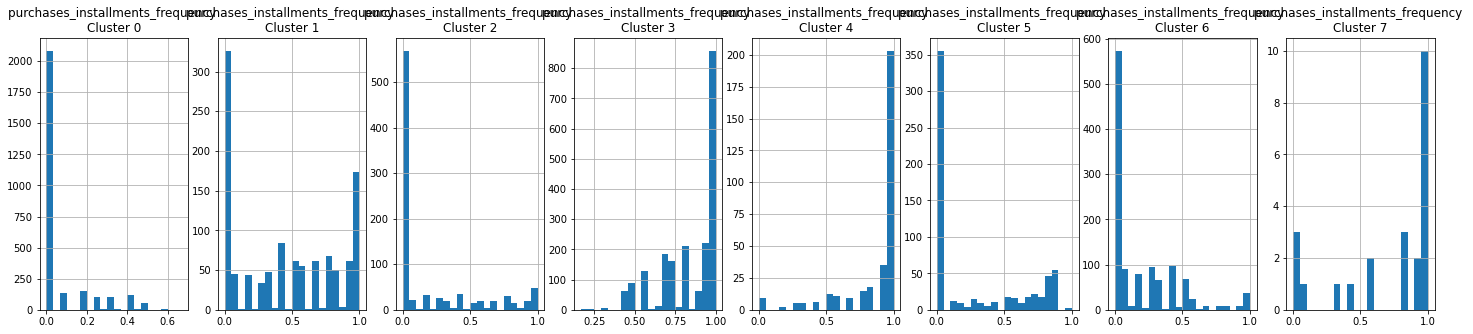

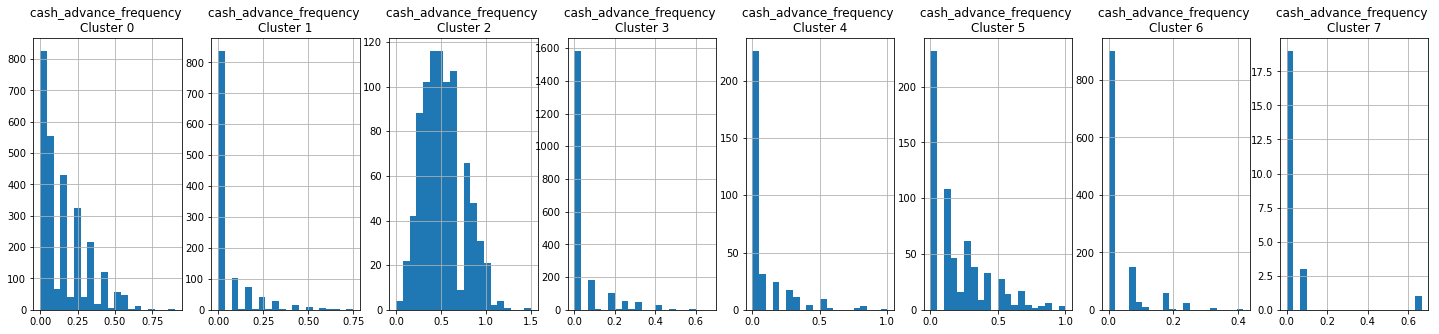

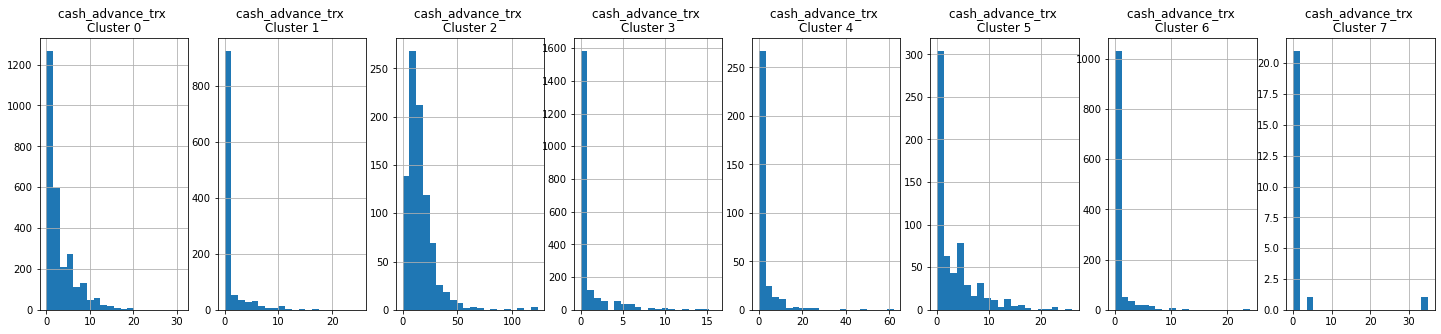

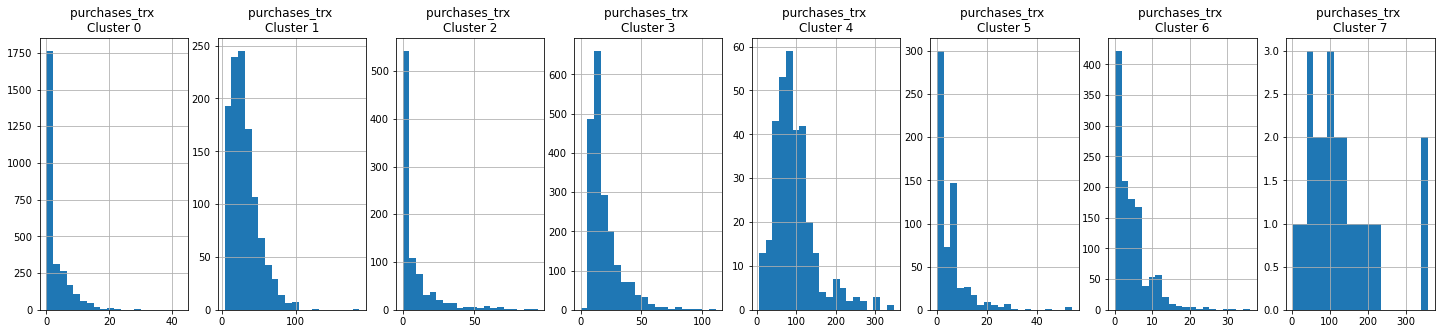

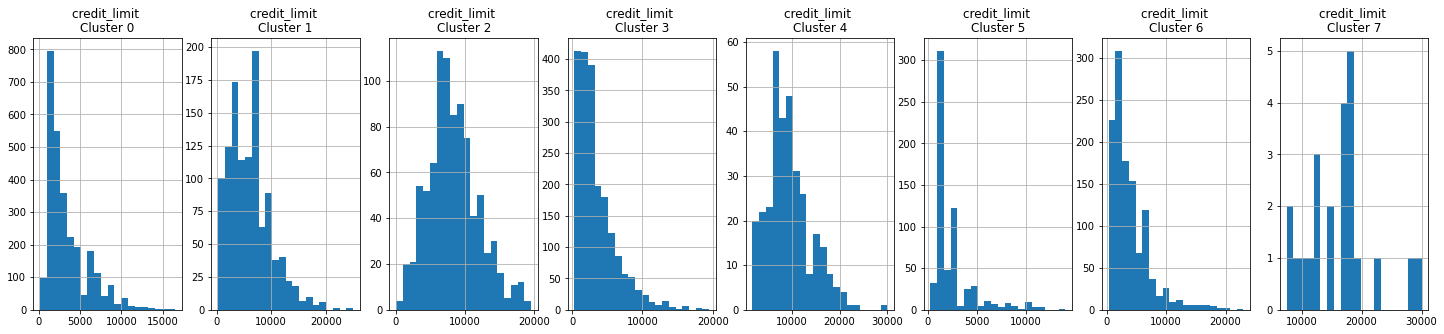

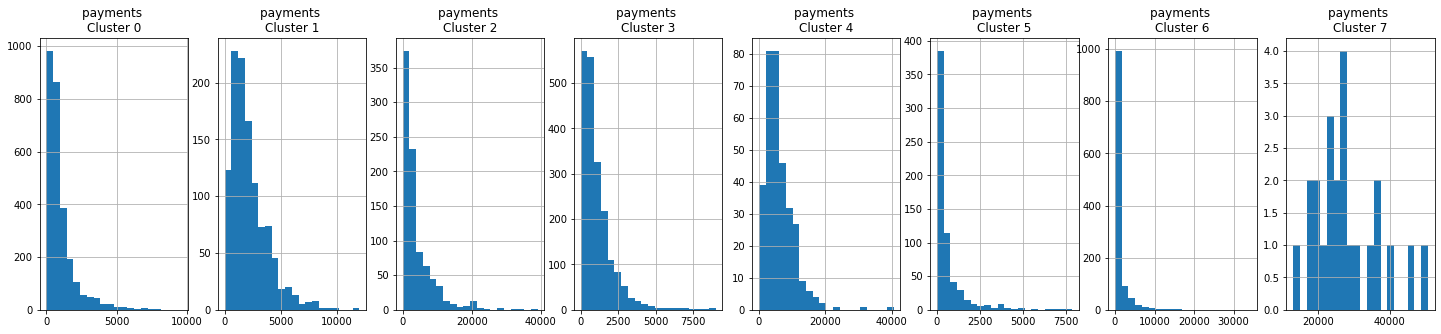

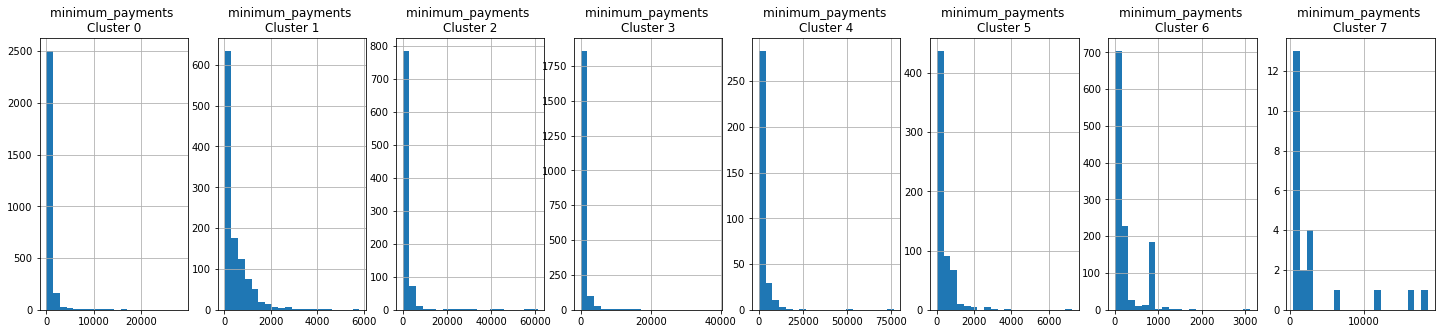

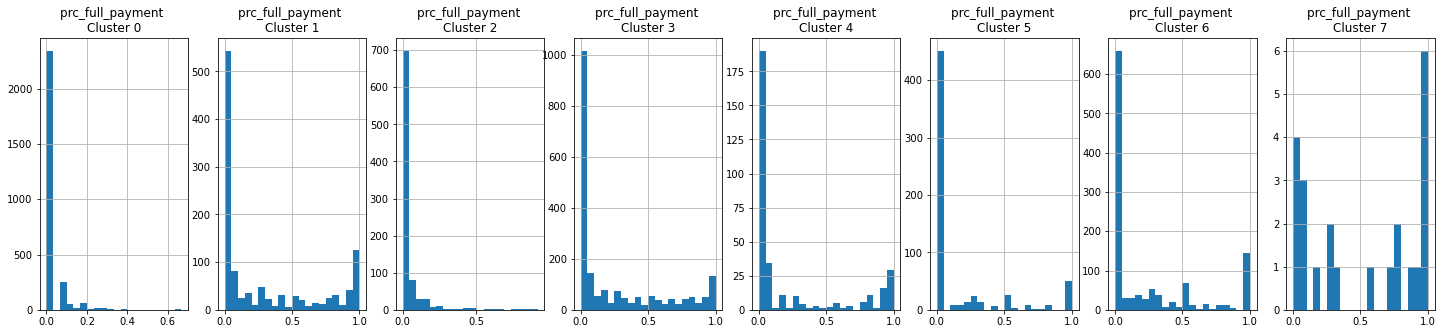

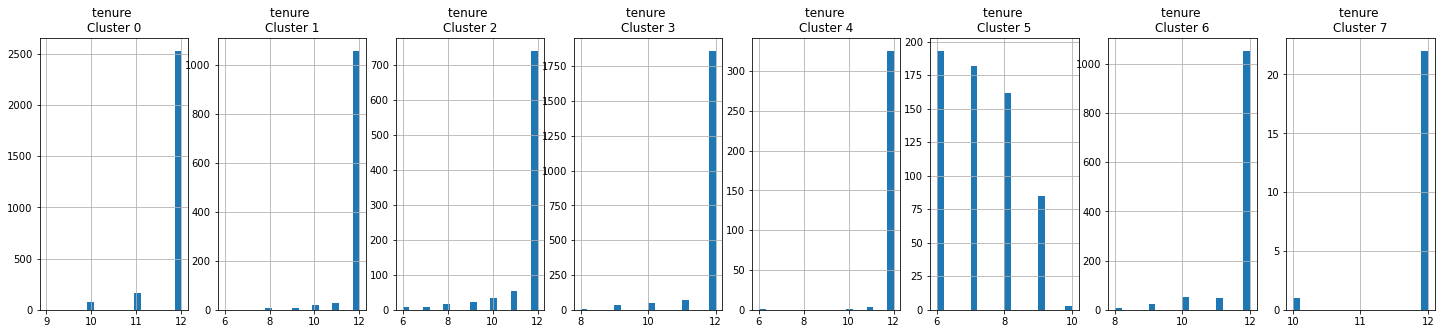

In [59]:
# Criar um histograma para visualizar os grupos que foram gerados
for i in df5_clientes.columns: # percorrer coluna por coluna
    plt.figure(figsize=(25,5)) # definir uma figura
    for j in range(8): # aqui vamos percorrer 8 vezes cada um dos cluster ou seja cada um dos grupos criados (0 até 7)
        plt.subplot(1, 8, j + 1)
        cluster = df_cluster[df_cluster['cluster'] == j] # aplicando um filtro
        cluster[i].hist(bins = 20) # gerar o histograma
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

**Nota:**

Analisando o grupo 3 com o grupo 4 em relação a três atributos:
 - Balance:
   - O grupo 4 mantém muito mais dinheiro na conta corrente.
 - Purchases:
   - O grupo 3 faz mais compras do que o grupo 4.
 - Oneoff_purchases:
   - O grupo 3 faz mais compras a vista do que o grupo 4.

### <font color='#F37126'> 6.2. Aplicação de PCA (principal component analysis) e visualização dos resultados

Principal component analysis é utilizado para redução de dimensionalidade, uma técnica que pode ser usada para ajudar na visualização do agrupamento.

- PCA é um algoritmo de aprendizagem não supervisionada, ou seja vamos fazer somente uma análise dos dados para redução de dimensionalidade.
- Aplica redução de dimensionalidade, porém, tenta manter as informações originais com as mesmas características
- Encontra um novo conjunto de características que são chamados de componentes
- Os componentes são criados por meio das características não correlacionadas, ou seja quando os atributos tem uma correlação forte (pode ser visto na matriz de correlação), o que o PCA vai procurar fazer é unir este dois atributos em um atributo somente.

In [60]:
# Criar uma variável para aplicação do PCA
pca = PCA(n_components=2) # Estamos definindo de 18 características para 2 características
# Transformação de cada atributo
principal_comp = pca.fit_transform(df5_clientes_scaler)
# Resultado foi de 18 atributos para somente 2 atributos
principal_comp

array([[-1.68222188, -1.07645326],
       [-1.13829408,  2.50647359],
       [ 0.96967156, -0.38351606],
       ...,
       [-0.92620337, -1.81078717],
       [-2.33655524, -0.65797176],
       [-0.5564285 , -0.40046568]])

In [61]:
# Criar um dataframe para colocar em qual cluster cada um dos registros pertence
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682222,-1.076453
1,-1.138294,2.506474
2,0.969672,-0.383516
3,-0.873625,0.043164
4,-1.599436,-0.688583


In [62]:
# Vamos adicionar cluster, para isso vamos criar um novo dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682222,-1.076453,0
1,-1.138294,2.506474,2
2,0.969672,-0.383516,1
3,-0.873625,0.043164,0
4,-1.599436,-0.688583,0


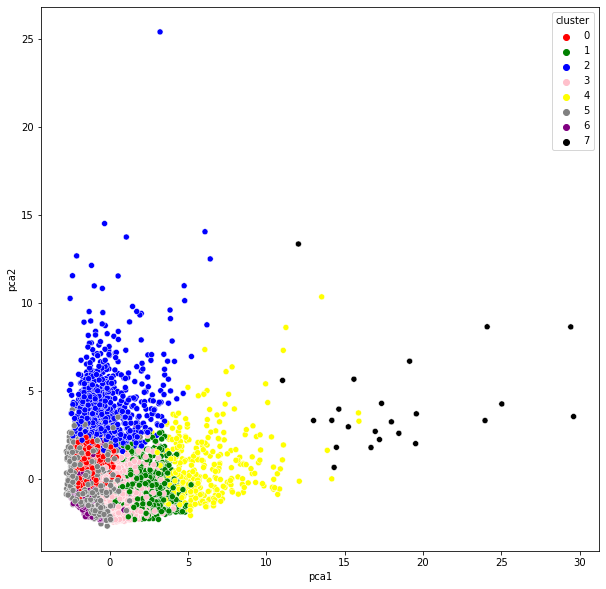

In [63]:
# Visualização de cada grupo de maneira gráfica
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']);

**Nota:**
- Desta forma fica melhor a visualização, porque podemos observar os grupos de maneira gráfica.
- Fazemos a redução de dimensionalidade, justamente para conseguir visualizar no gráfico como os grupos estão dispostos.
- Mas não é possivél indicar que 'pca1' é o 'Balance' e o 'pca2' é o 'Purchases', porque foi feito uma redução de dimensionalidade e teve um algoritmo que fez toda a combinação dos atributos.
- Este gráfico é mais para conseguir visualizar melhor os dados.

# <font color='red'> 8 - IMPLEMENTAR O MODELO PARA A PRODUÇÃO
<a id='producao'></a>

## <font color='blue'> PASSO 7 - Modelo em Produção
<a id='passo10'></a>

Criar uma codificação adicional simulando como se fosse enviar essa base de dados para o departamento de Marketing.

In [64]:
# Ordenando a base pelo atributo cluster em uma nova variável
df_cluster_ordenado = df_cluster.sort_values(by = 'cluster')
df_cluster_ordenado.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
4228,1437.977941,1.000000,229.94,229.94,0.0,901.185629,0.250000,0.250000,0.000000,0.583333,10,4,1800.0,783.528158,394.172631,0.0,12,0
4230,2063.855487,1.000000,220.40,220.40,0.0,2274.848149,0.083333,0.083333,0.000000,0.666667,11,1,2500.0,468.683047,441.951462,0.0,12,0
4233,1117.003540,1.000000,240.00,240.00,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,9,1200.0,366.532467,1020.099462,0.0,12,0
4234,198.815177,1.000000,247.50,0.00,247.5,0.000000,0.166667,0.000000,0.166667,0.000000,0,3,4000.0,283.508460,249.335824,0.0,12,0


In [65]:
df_cluster_ordenado.tail()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
587,2492.726282,1.000000,27957.68,23032.97,4924.71,0.00000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.00752,537.372671,1.000000,12,7
5358,6372.182817,1.000000,22101.78,22101.78,0.00,19513.47483,0.333333,0.333333,0.000000,0.666667,35,40,7500.0,39461.96580,6764.853481,0.250000,12,7
1641,3454.094319,1.000000,31299.35,19064.30,12235.05,0.00000,1.000000,0.666667,0.833333,0.000000,0,121,7500.0,22542.58705,1193.031030,0.583333,12,7
4220,1268.809031,0.272727,17945.00,17945.00,0.00,0.00000,0.166667,0.166667,0.000000,0.000000,0,3,18000.0,50721.48336,1149.747342,0.000000,12,7
507,2643.343414,1.000000,26402.39,22257.39,4145.00,0.00000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.27662,534.032339,1.000000,12,7


In [66]:
# Salvando o arquivo
df_cluster_ordenado.to_csv('cluster.csv')

# <font color='red'> INSIGHTS

**Resumo dos insights durante análise exploratória de dados (EDA):**


- Separar um grupo de cliente que possuem uma tendência maior a sacar dinheiro do limite do cartão de crédito, pois assim o banco poderia aumentar o limite e os clientes poderia sacar mais dinheiro e o banco passaria a ganhar mais.
- Poderiamos separar grupos, pessoas que faz compra a vista e pessoas que faz compras a prazo, para que o banco possa enviar campanha de marketing diferentes.
- No atributo **Purchases_frequency**, podemos identificar dois grupos, um grupo de que usa muito o cartão de crédito e outro que praticamente não usa cartão de crédito, desta forma o banco pode análisar e mandar campanha diferente para cada perfil de cliente.

# <font color='red'> PRÓXIMO PASSOS

- Aplicação de autoencoders que são um tipo de redes neurais artificiais para codificar dados, uma forma alternativa para a aplicação do PCA. 